Este notebook foi desenvolvido no curso 'Fundamentos de Linguagem Python Para Análise de Dados e Data Science' da Data Science Academy (DSA). Algumas alterações, comentários e complementos acerca do tema foram adicionados por mim.

Machine Learning com Scikit-Learn

Problema de Negócio:
* Usando dados históricos é possível prever o salário de alguém com base no tempo dedicado aos estudos em horas por mês?

**Machine Learning**

"MachineLearning   (Aprendizado   de   Máquina,   em   português)   é   um   subcampo   da Inteligência Artificial (IA) que foca no desenvolvimento de algoritmos e técnicas que permitem aos  computadores  aprender  e  melhorar  seu  desempenho  em  tarefas  específicas  sem  serem explicitamente   programados.   Essa   aprendizagem   é   baseada   na   análise   de   dados   e   na identificação de padrões dentro desses dadosatravés do uso de algoritmos."

"Machine   Learning   é   uma   abordagem   da   computação   e Inteligência Artificial   que possibilita aos sistemas adquirirem conhecimento e habilidades a partir de dados e experiências, adaptando-se   automaticamente   para   melhorar   seu   desempenho   em   tarefas   específicas. Essencialmente,  o  objetivo  do  aprendizado  de  máquina  é  criar  modelos  capazes  de  identificar padrões  e  fazer  previsões  com  base  em  informações  fornecidas,  sem  a  necessidade  de programação explícita para cada situação ou problema."

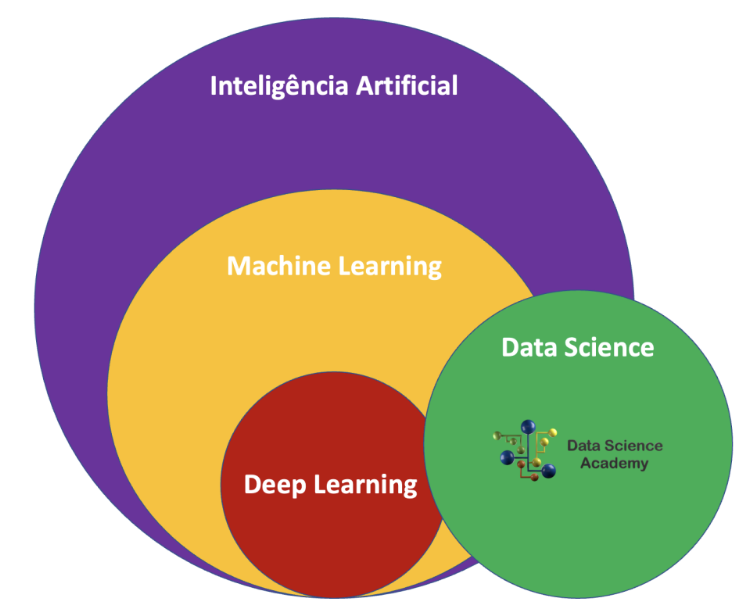

"Existem vários métodos e abordagens em Machine Learning, incluindo:
* **Aprendizado Supervisionado**:  O  algoritmo  é  treinado  com  um  conjunto  de  dados rotulados, onde os exemplos de entrada são associados a saídas corretas. O objetivo é aprender a mapear as entradas para as saídas e fazer previsões precisas em dados novos e desconhecidos.
* **Aprendizado Não Supervisionado**: O algoritmo é treinado com um conjunto de dados não rotuladose o objetivo é identificar padrões, estruturas ou agrupamentos nos dados. Técnicas comuns incluem clusterização e redução de dimensionalidade.
* **Aprendizado Por Reforço**: O algoritmo aprende a tomar decisões com base em interações com um ambiente, recebendo feedback na forma de recompensas ou punições. O objetivo é maximizar a recompensa acumulada ao longo do tempo.

Machine  Learning  tem  muitas  aplicações  práticas  em  áreas  como  processamento  de linguagem natural, visão computacional, reconhecimento de voz, sistemas de recomendação e diagnóstico médico, entre outras."

**APRENDIZADO SUPERVISIONADO**

"O  aprendizado  supervisionado  é  um  dos  principais  tipos  de  abordagens  em  Machine Learninge que veremos na práticaagora neste capítulo.

Nesse método, o algoritmo é treinado utilizando um conjunto de dados rotulados, em que  cada  exemplo  de  entrada  possui  uma  saída  correspondente,  também  conhecida  como "rótulo" ou "etiqueta". O objetivo é que o modelo aprenda a mapear as entradas para as saídas corretas e, assim, seja capaz de fazer previsões precisas para dados novos e desconhecidos.

Durante o processo de treinamento, o algoritmo analisa os exemplos deentrada e ajusta seus parâmetros internos para minimizar a diferença entre as previsões geradas e as saídas corretas (rótulos). Este processo é realizado iterativamente até que o modelo atinja um nível aceitável de precisão.

O aprendizado supervisionado pode ser aplicado em dois tipos principais de problemas:
* **Regressão**: quando a saída esperada é um valor contínuo, como a previsão de preços de imóveis ou a estimativa da idade de uma pessoa com base em características específicas.
* **Classificação**: quando a saída esperada é uma categoria ou classe, como determinar se um e-mail é spam ou não spam, ou identificar a espécie de uma planta com base em medidas de suas características.

O aprendizado supervisionado é amplamente utilizado em muitas aplicações práticas, como reconhecimento de dígitos escritos à mão, diagnóstico médico e análise de sentimentos em textos, entre outros."

In [1]:
# Versão da Linguagem Python
from platform import python_version
print('Versão da Linguagem Python Usada Neste Notebook:', python_version())

Versão da Linguagem Python Usada Neste Notebook: 3.11.13


In [2]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

## Carregando os Dados

In [3]:
# Carrega o dataset
df_dsa = pd.read_csv('dataset.csv')

In [4]:
df_dsa.shape

(500, 2)

In [5]:
df_dsa.columns

Index(['horas_estudo_mes', 'salario'], dtype='object')

In [6]:
df_dsa.head()

,horas_estudo_mes,salario
0,57.0,6813.0
1,48.0,6855.0
2,60.0,5801.0
3,73.0,7431.0
4,46.0,5475.0


In [7]:
df_dsa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   horas_estudo_mes  500 non-null    float64
 1   salario           500 non-null    float64
dtypes: float64(2)
memory usage: 7.9 KB


## Análise Exploratória - Resumo Estatístico

In [8]:
# Verifica se há valores ausentes
df_dsa.isnull().sum()

,0
horas_estudo_mes,0
salario,0


In [9]:
# Correlação
df_dsa.corr()
# Vai de 1 até -1
# perto de 1 = forte correlação positiva
# perto de -1 = forte correlação negativa
# perto de 0 = não há correlação

# Obs: o '1.0' na diagonal (abaixo) representa da variável com ela mesma

# 0.818 = forte correlação!

,horas_estudo_mes,salario
horas_estudo_mes,1.000000,0.818576
salario,0.818576,1.000000


Cada variável preditora - boa correlação com a variável alvo!

Obs: se tiver mais de uma variável preditora CUIDADO! Com a multicolinearidade, não pode ter uma forte correlação entre elas, entre as variáveis preditoras.

In [10]:
# Resumo estatístico do dataset
df_dsa.describe()

,horas_estudo_mes,salario
count,500.000000,500.000000
mean,50.060000,6018.930000
std,14.659406,848.697853
min,1.000000,3664.000000
25%,39.750000,5473.000000
50%,50.000000,6013.500000
75%,60.000000,6542.000000
max,100.000000,9348.000000


In [11]:
# Resumo estatístico da variável preditora (entrada)
df_dsa["horas_estudo_mes"].describe()

,horas_estudo_mes
count,500.000000
mean,50.060000
std,14.659406
min,1.000000
25%,39.750000
50%,50.000000
75%,60.000000
max,100.000000


<Axes: xlabel='horas_estudo_mes', ylabel='Count'>

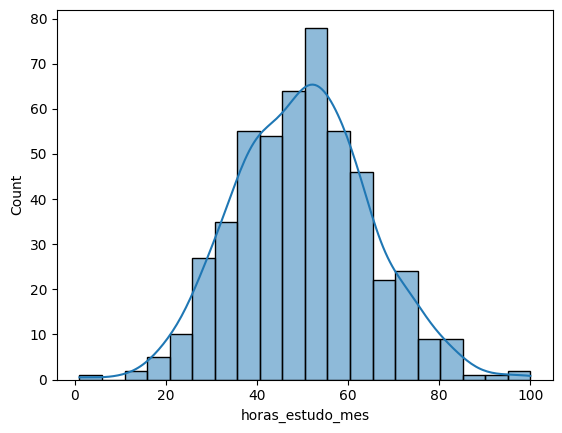

In [12]:
# Histograma da variável preditora (entrada)
sns.histplot(data = df_dsa, x = "horas_estudo_mes", kde = True)

# Esse é o comportamento esperado!

## Preparação dos Dados

X = Variável de Entrada

Y = Variável de Saída

O algoritmo de Regressão Linear no Scikit-Learn espera receber os dados de entrada no formato de Array (matriz), por isso é necessário a conversão:

In [13]:
# Prepara a variável de entrada X
X = np.array(df_dsa['horas_estudo_mes'])

In [14]:
type(X)

numpy.ndarray

* X.reshape(): Este é um método do objeto NumPy array que permite alterar a forma (shape) da matriz.
* -1: Este valor indica que o número de linhas deve ser calculado automaticamente pelo NumPy com base no tamanho total do array e no número de colunas especificado.
* 1: Este valor define que a nova matriz terá apenas uma coluna.

Por exemplo, se X tem a forma (10,), ou seja, um array unidimensional com 10 elementos, X.reshape(-1, 1) irá transformá-lo em uma matriz com 10 linhas e 1 coluna, ou seja, com a forma (10, 1).

Essa operação é frequentemente usada quando se deseja garantir que uma variável seja tratada como uma coluna em cálculos que esperam matrizes com colunas específicas. Por exemplo, ao usar certos algoritmos de aprendizado de máquina, é comum que os dados de entrada sejam apresentados como matrizes colunares.

In [15]:
# Ajusta o shape de X
X = X.reshape(-1, 1)

In [16]:
# Prepara a variável alvo
y = df_dsa['salario']
# Só filtrar a variável

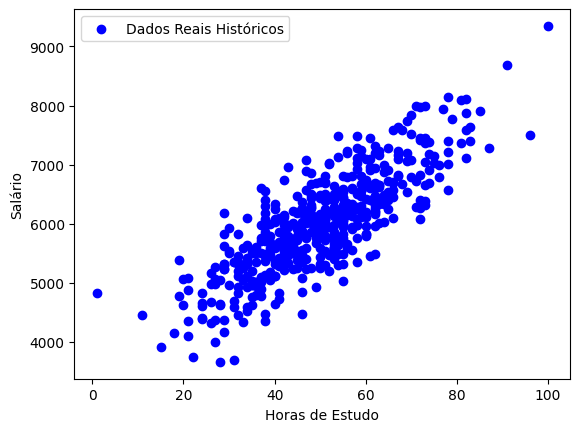

In [17]:
# Gráfico de dispersão entre X e y
plt.scatter(X, y, color = "blue", label = "Dados Reais Históricos")
plt.xlabel("Horas de Estudo")
plt.ylabel("Salário")
plt.legend()
plt.show()

Existe uma correlação positiva no gráfico! Uma aumenta, a outra também!

Lembrando que CORRELAÇÃO não indica CAUSALIDADE.

**Divisão dos Dados!**

* Por que dividir os dados?
* Se treinar o modelo com todos os registros, como avaliar depois (o modelo)?

AMOSTRA DE TREINO: treinar o modelo.

AMOSTRA DE TESTE: testar o modelo.

Obs: em Deep Learning, há a terceira amostra, de Validação!

In [18]:
# Dividir dados em treinamento e teste
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size = 0.2, random_state = 42)

* **train_test_split** = técnica estatística de amostragem (ALEATÓRIA, se rodar de novo SEM O 'random_state', serão dados diferentes).
* **test_size = 0.2** > 20% dos dados para o Teste. E logo, 80% para o Treino!

In [19]:
X_treino.shape

(400, 1)

In [20]:
X_teste.shape

(100, 1)

Por que o 'shape' de 'x' e 'y' são diferentes?
* x = 400 linhas e 1 coluna
* y = 400 linhas e ...

X está no formato de matrix, e o Y no formato de Vetor!

In [21]:
y_treino.shape

(400,)

In [22]:
y_teste.shape

(100,)

## Modelagem Preditiva (Machine Learning)

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

A **Regressão Linear Simples** é um método estatístico que busca modelar a relação entre uma **variável dependente (resposta)** e uma **única variável independente (preditora)** através de uma equação de linha reta. Essa técnica é utilizada para entender como a variável independente influencia a variável dependente, permitindo fazer previsões.

Fórmula:

**Y = a + bX**

* **Y**: É a variável dependente, aquela que se deseja prever ou explicar.
* **X**: É a variável independente, que se acredita influenciar a variável dependente.
* **a**: É a interceptação da reta com o eixo Y, ou seja, o valor de Y quando X é zero.
* **b**: É o coeficiente angular da reta, que indica a variação de Y para cada unidade de variação de X.

É importante lembrar que a regressão linear simples tem algumas limitações:
* **Relação linear:**
  Assume que a relação entre as variáveis é linear (uma linha reta). Se a relação for curvilínea, o modelo pode não ser adequado.
* **Causalidade:**
  A regressão linear simples mostra a correlação entre as variáveis, mas não necessariamente implica causalidade. Ou seja, se X e Y estão relacionados, não significa que X causa Y.
* **Outras variáveis:**
  A regressão simples considera apenas uma variável independente. Se outras variáveis também influenciarem Y, o modelo pode não ser preciso.

In [23]:
# Cria o modelo de regressão linear simples
modelo = LinearRegression() # é uma classe
# O modelo será uma instância, um objeto

Dentro do parênteses, colocamos os HIPERPARÂMETROS, que serão utilizados para treinar o algoritmo

In [24]:
# Treina o modelo
modelo.fit(X_treino, y_treino)
# fit - atributo da classe
# fit - treina!

LinearRegression()

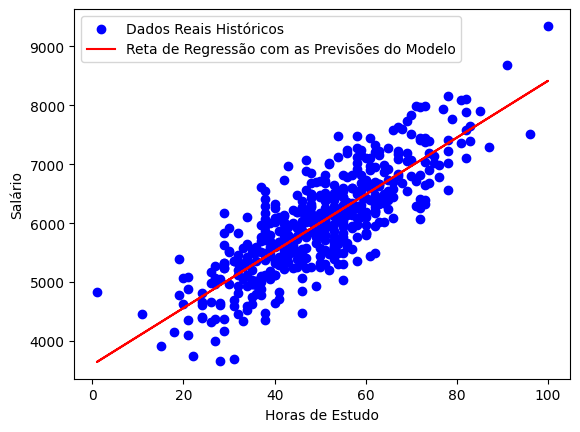

In [25]:
# Visualiza a reta de regressão linear (previsões) e os dados reais usados no treinamento
plt.scatter(X, y, color = "blue", label = "Dados Reais Históricos") # x e y real
plt.plot(X, modelo.predict(X), color = "red", label = "Reta de Regressão com as Previsões do Modelo") # os preditos
plt.xlabel("Horas de Estudo")
plt.ylabel("Salário")
plt.legend()
plt.show()

* Os pontos azuis são os dados reais.
* X é a variável de entrada.
* Y é a variável de saída.
* Linha vermelha - predições do modelo, ou seja, o valor previsto para Y.

**Ao criar o modelo, você está encontrando uma fórmula matemática que é uma aproximação daquilo que explica X e Y. Aproximação já é o suficiente, é bom!Nenhum modelo (até então) será 100% previsto, tem uma taxa de erro aceitável, tolerável de acordo com o problema em questão.**

In [26]:
# Avalia o modelo nos dados de teste
score = modelo.score(X_teste, y_teste)
print(f"Coeficiente R^2: {score:.2f}")

# score - retorna o R2, que vai de 0 a 1. Quanto maior, melhor!

Coeficiente R^2: 0.59


Não é o melhor, é razoável. Conseguimos explicar uma parte da variação da variável alvo.

**Quanto melhor o modelo, mais preciso será nas predições!**

Alguns atributos do modelo:

In [27]:
# Intercepto - parâmetro w0
modelo.intercept_

# Ponto que a linha de regressão cruza o ponto Y, interceptor

np.float64(3596.7837243727545)

In [28]:
# Slope - parâmetro w1
modelo.coef_
# cálculo da inclinação da reta, slope

array([48.18185277])

Algoritmo de Regressão Linear:

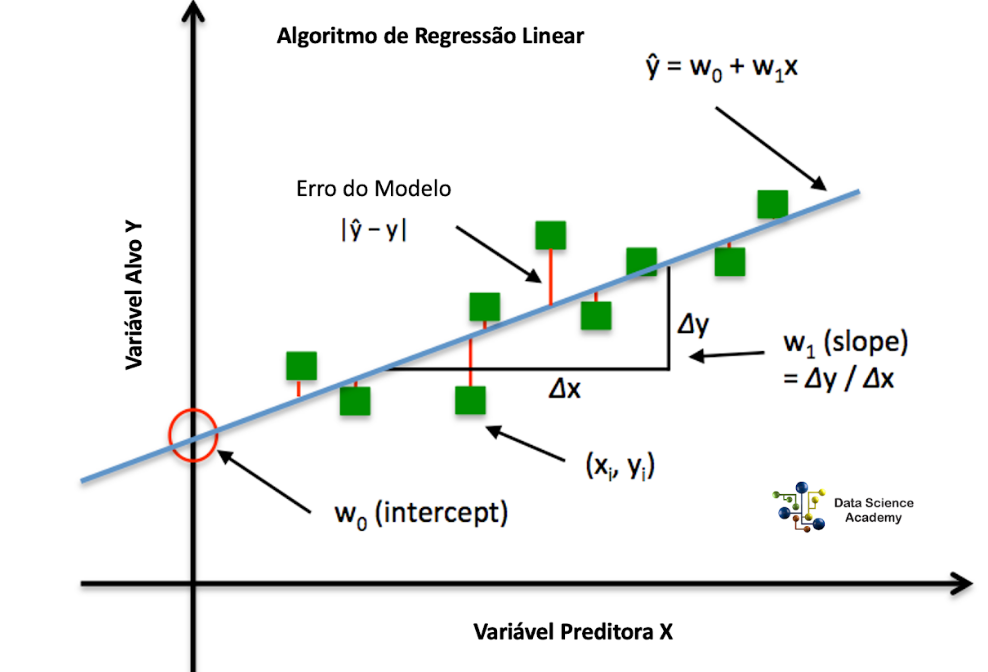![DSA](imagens/reglinear.png)

MACHINE LEARNING É MATEMÁTICA!

## Deploy do Modelo

Usaremos o modelo para prever o salário com base nas horas de estudo.

DEPLOY - usar o modelo!
Geralmente é o Engenheiro de Machine Learning.

In [29]:
# Define um novo valor para horas de estudo
horas_estudo_novo = np.array([[48]]) # nesse formato... array

# Faz previsão com o modelo treinado
salario_previsto = modelo.predict(horas_estudo_novo) # predict - vai aplicar o novo dado no modelo já treinado. Executar a fórmula...

print(f"Se você estudar cerca de", horas_estudo_novo, "horas por mês seu salário pode ser igual a", salario_previsto)

Se você estudar cerca de [[48]] horas por mês seu salário pode ser igual a [5909.5126574]


predict - aplica a equação!

In [30]:
# Mesmo resultado anterior usando os parâmetros (coeficientes) aprendidos pelo modelo
# y_novo = w0 + w1 * X
salario = modelo.intercept_ + (modelo.coef_ * horas_estudo_novo)
print(salario)
# 2 coeficientes

[[5909.5126574]]


In [31]:
# Define um novo valor para horas de estudo
horas_estudo_novo = np.array([[65]])

# Faz previsão com o modelo treinado
salario_previsto = modelo.predict(horas_estudo_novo)

print(f"Se você estudar cerca de", horas_estudo_novo, "horas por mês seu salário pode ser igual a", salario_previsto)

Se você estudar cerca de [[65]] horas por mês seu salário pode ser igual a [6728.60415452]


In [32]:
# Define um novo valor para horas de estudo
horas_estudo_novo = np.array([[73]])

# Faz previsão com o modelo treinado
salario_previsto = modelo.predict(horas_estudo_novo)

print(f"Se você estudar cerca de", horas_estudo_novo, "horas por mês seu salário pode ser igual a", salario_previsto)

Se você estudar cerca de [[73]] horas por mês seu salário pode ser igual a [7114.05897669]
